<a href="https://colab.research.google.com/github/marismendi9/sales-predictions/blob/main/sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicción de ventas  para productos alimenticios vendidos en diversas tiendas**
### Mariana Arismendi

## **0. Introducción a los datos**

In [1]:
#Importar la librería de pandas:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Importar datos:
url = "https://raw.githubusercontent.com/marismendi9/sales-predictions/main/sales_predictions.csv"

In [3]:
#Leer archivo:
df = pd.read_csv(url)

### **Información de las columnas**

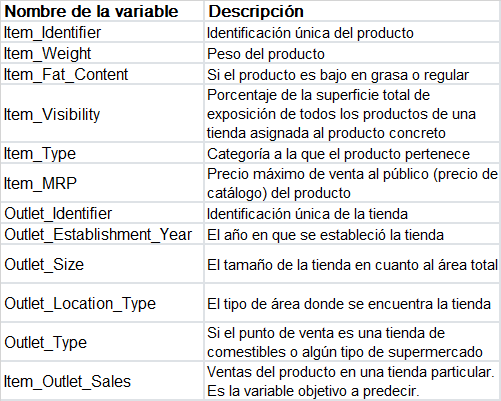

In [4]:
#Imprimir las primeras 5 columnas (verificar que se subió correctamente el archivo):
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## **1. Limpieza de los datos**

In [5]:
# Chequear si hay duplicados:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [6]:
# Vemos cuántos duplicados hay:
df.duplicated().sum()

0

In [7]:
# Corroboramos estén bien escritos los nombres de las columnas:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
# Tamaño del dataframe:
df.shape

(8523, 12)

In [9]:
# Examinar el número de valores únicos de cada columna:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [10]:
# Revisar tipos de datos y valores nulos:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Los tipos de datos son consistentes, procedemos a analizar los valores nulos:

In [11]:
# Identificar el número de non-values de cada columna:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Comenzamos con Item_Weight:
Hay 8522 filas, 1559 productos diferentes y 415 diferentes pesos. Deducimos que los valores nulos están para productos que tienen su peso descrito en otras filas. O sea que por GroupBy, que omite nulos, podemos identificarlos para luego reemplazarlos.

In [12]:
# Agrupamos el Item_Identifier y el Item_Weight y luego reemplazamos los valores nulos con esta información:
x = df.groupby('Item_Identifier')['Item_Weight'].max()

df = df.set_index('Item_Identifier')
df['Item_Weight'] = df['Item_Weight'].fillna(x)
df = df.reset_index()

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [13]:
# Identificamos si quedan non-values en esta columna:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
# Vemos qué datos continuan siendo nulos en esta columna:
w_null = df[df['Item_Weight'].isnull()]
w_null

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [15]:
# Debido a que son productos únicos y que son muy pocos, reemplazamos su peso con la media de la columna
# Esto no afectará mucho la muestra y no perderemos datos
media = df['Item_Weight'].mean()
media

12.875420237117032

In [16]:
df['Item_Weight'].fillna(media, inplace = True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Los datos nulos restantes corresponden al tamaño de la tienda. Notamos que solo hay 10 tiendas. Procedemos a verificar si cada tienda tiene asignado su tamaño mediante un groupby para poder autocompletar los nulos con esta información

In [17]:
# Identificamos el tamaño de cada tienda
df.groupby('Outlet_Identifier')['Outlet_Size'].max()

Outlet_Identifier
OUT010       NaN
OUT013      High
OUT017       NaN
OUT018    Medium
OUT019     Small
OUT027    Medium
OUT035     Small
OUT045       NaN
OUT046     Small
OUT049    Medium
Name: Outlet_Size, dtype: object

Existen tres tiendas que no tienen la característica de tamaño definida y el único dato posible que sea constante en todos para compararlo son las ventas, ya que para Outlet_Location_Type, Outlet_Type y Outlet_Establishment_Year estos son independientes del Outlet_Size.

Se decidirá el tamaño de la tienda analizando sus ventas y comparando qué posición ocupan otros outlets respecto a las mismas.

In [18]:
# Visualizamos un promedio de ventas de acuerdo al tamaño de la tienda:
df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean()

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [19]:
# Visualizamos las ventas promedio de las tres tiendas sin el tamaño identificado:
## Tienda 1:
a = df['Outlet_Identifier'] == 'OUT010'
df[a].mean()

### La clasificamos como Small

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


Item_Weight                    12.913153
Item_Visibility                 0.101457
Item_MRP                      140.777594
Outlet_Establishment_Year    1998.000000
Outlet_Size                          NaN
Item_Outlet_Sales             339.351662
dtype: float64

In [20]:
## Tienda 2:
b = df['Outlet_Identifier'] == 'OUT017'
df[b].mean()

### La clasificamos como Medium (a pesar de tener más ventas, el análisis arrojó mayor volumen de ventas en tiendas medianas respecto a las grandes)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Item_Weight                    12.826668
Item_Visibility                 0.061377
Item_MRP                      139.421119
Outlet_Establishment_Year    2007.000000
Outlet_Size                          NaN
Item_Outlet_Sales            2340.675263
dtype: float64

In [21]:
## Tienda 3:
c = df['Outlet_Identifier'] == 'OUT045'
df[c].mean()

### La clasificamos como High

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Item_Weight                    12.649989
Item_Visibility                 0.060474
Item_MRP                      140.950246
Outlet_Establishment_Year    2002.000000
Outlet_Size                          NaN
Item_Outlet_Sales            2192.384798
dtype: float64

In [22]:
# Realizamos el reemplazo del tamaño de Outlet_Size una vez para cada una de las tiendas faltantes:
## Hallamos la primer fila donde aparece cada tienda para realizar los reemplazos con índices:
ind_a = (df.index[df['Outlet_Identifier'] == 'OUT010'].tolist())[0]
ind_b = (df.index[df['Outlet_Identifier'] == 'OUT017'].tolist())[0]
ind_c = (df.index[df['Outlet_Identifier'] == 'OUT045'].tolist())[0]
print(ind_a,ind_b,ind_c)

3 9 8


In [23]:
# Para OUT010:
df['Outlet_Size'][ind_a] = 'Small'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
# Para OUT017:
df['Outlet_Size'][ind_b] = 'Medium'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
# Para OUT045:
df['Outlet_Size'][ind_c] = 'High'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
# Verificamos que se hayan hecho los reemplazos:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,High,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [27]:
# Deducimos cambiar los tamaños a números para poderlos agrupar después con groupby y su posterior reemplazo:
dic_size = {'Small' : 3 , 'Medium' : 2 , 'High' : 1}

In [28]:
# Reemplazamos los nombres de la columna Outlet_Size por números:
df['Outlet_Size'].replace(dic_size, inplace = True)

In [29]:
# Aplicamos promedio para verificar que todos tengan el mismo valor:
df.groupby('Outlet_Identifier')['Outlet_Size'].mean()

Outlet_Identifier
OUT010    3.0
OUT013    1.0
OUT017    2.0
OUT018    2.0
OUT019    3.0
OUT027    2.0
OUT035    3.0
OUT045    1.0
OUT046    3.0
OUT049    2.0
Name: Outlet_Size, dtype: float64

In [30]:
# Procedemos a aplicar GroupBy para el reemplazo masivo:
y = df.groupby('Outlet_Identifier')['Outlet_Size'].mean()

df = df.set_index('Outlet_Identifier')
df['Outlet_Size'] = df['Outlet_Size'].fillna(y)
df = df.reset_index()

In [31]:
# Verificamos si quedan valores nulos:
df.isna().sum()

Outlet_Identifier            0
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [32]:
# Y verificamos los valores únicos:
df['Outlet_Size'].unique()

array([2., 3., 1.])

In [33]:
# Creamos un diccionario de los datos con su nombre original:
dic_size_2 = {1:'High', 2: 'Medium', 3 : 'Small'}
dic_size_2

{1: 'High', 2: 'Medium', 3: 'Small'}

In [34]:
# Reemplazmos otra vez:
df['Outlet_Size'].replace(dic_size_2, inplace = True)
df.head()

,Outlet_Identifier,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,OUT049,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,OUT018,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,OUT049,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,OUT010,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Small,Tier 3,Grocery Store,732.3800
4,OUT013,NCD19,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [35]:
# Ahora podemos identificar el tamaño de cada tienda:
df.groupby('Outlet_Identifier')['Outlet_Size'].max()

Outlet_Identifier
OUT010     Small
OUT013      High
OUT017    Medium
OUT018    Medium
OUT019     Small
OUT027    Medium
OUT035     Small
OUT045      High
OUT046     Small
OUT049    Medium
Name: Outlet_Size, dtype: object

In [36]:
# Reformamos el orden original de las columnas:
df = df[['Item_Identifier', 'Item_Weight',
       'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']]
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [37]:
# Visión de la info del dataframe al final de la limpieza:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [38]:
# Verificamos que no hayan datos inconsistentes en las columnas categóricas:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [39]:
# Realizamos los reemplazos necesarios
df['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}, inplace = True)

# Verificamos que se hayan hecho los reemplazos
df['Item_Fat_Content'].unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


array(['Low Fat', 'Regular'], dtype=object)

## **2. Estadísticas resumidas de las columnas numéricas**

In [40]:
# Resumen estadístico del dataframe:
round(df.describe(),3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000,8523.000,8523.000,8523.000,8523.000
mean,12.875,0.066,140.993,1997.832,2181.289
std,4.645,0.052,62.275,8.372,1706.500
min,4.555,0.000,31.290,1985.000,33.290
25%,8.785,0.027,93.826,1987.000,834.247
50%,12.650,0.054,143.013,1999.000,1794.331
75%,16.850,0.095,185.644,2004.000,3101.296
max,21.350,0.328,266.888,2009.000,13086.965


## **3. Análisis exploratorio de datos**

Nos planteamos las siguientes preguntas inciales viendo el tipo de variables que tenemos:

1. **Productos**
* ¿Existe alguna correlación entre alguna de las características de estos?
* Productos más vendidos y sus características
* Productos menos vendidos y sus características

2. **Outlets**
* ¿Existe alguna correlación entre alguna de las características de las tiendas?
* Las tiendas que más venden, ¿por qué venden más?
* ¿Cuáles productos tienen más visibilidad?
* Características de la tienda
* ¿Tiene que ver la tienda o tiene que ver los productos en específico?
* Lo mismo para las que venden menos

3. **Características de los productos de los outllets**
* De entre los productos del mismo tipo, son más visibles por ¿Precio, contenido graso, peso?
* Relación de visibilidad con contenido graso y tipo de producto y precio
* ¿Qué tipo de productos exponen más? ¿Los más caros o los más baratos?
* ¿Exponer productos con precio más altos afecta las ventas, positiva o negativamente o es indiferente?
* Tipos de productos más comunes de cada tienda, ¿afecta esto las ventas?

4. **Datos atípicos**
* Tiendas que vendan mucho más o menos, ¿por qué?
* Productos anormalmente más visibles o costosos

5. **Plantear hipótesis de los resultados**

Para estos análisis se realizaron múltiple tablas y gráficos, sin embargo se mostrarán a continuación únicamente los más relevante en la exploración de los datos.

### **Mapas de calor**

In [42]:
# Dataframe productos
df_p = df.drop(columns={'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'})

df_p.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Item_Outlet_Sales'],
      dtype='object')

In [44]:
# Calculamos las correlaciones
corr = df_p.corr()

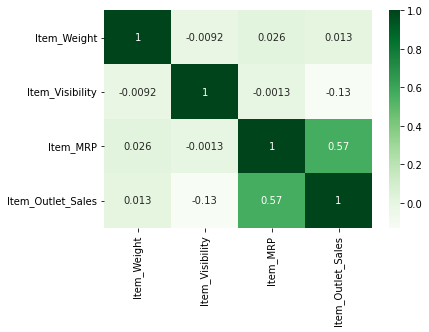

In [45]:
# Creamos el mapa de calor con los coeficientes de correlación actuales
import seaborn as sns
sns.heatmap(corr, cmap = 'Greens', annot = True)

* Existe una correlación moderada a fuerte entre los precios y las ventas de los productos, sin embargo esto podría deberse a la misma alza de precio que causa mayor entrada de dinero por ese lado, hay que seguir explorando. No existe ninguna otra correlación visible.

Por otro lado se toma la decisión de convertir algunas categorías categóricas a números para poder visualizar algunas relaciones entre sí, ya que sobre todo son categorías de tamaño, lo cual se puede representar numéricamente de más grandes a más pequeñas.

Esto lo haremos en una copia del dataframe, para tener ambos a la mano.

In [46]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [47]:
df2 = df.copy()
df2;

In [48]:
# Reemplazo de variables categóricas
## Item_Fat_Content
df2['Item_Fat_Content'].replace({'Low Fat': 1, 'Regular':2}, inplace = True)

# Confirmación del reemplazo
df2['Item_Fat_Content'].unique()

array([1, 2])

In [49]:
# Reemplazo de variables categóricas
## Item_Fat_Content
df2['Outlet_Size'].replace({'High': 3, 'Medium': 2, 'Small': 1}, inplace = True)

# Confirmación del reemplazo
df2['Outlet_Size'].unique()

array([2, 1, 3])

In [50]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [51]:
# Reemplazo de variables categóricas
## Outlet_Location_Type
df2['Outlet_Location_Type'].replace({'Tier 3': 3, 'Tier 2': 2, 'Tier 1': 1}, inplace = True)

# Confirmación del reemplazo
df2['Outlet_Location_Type'].unique()

array([1, 3, 2])

In [52]:
# Reemplazo de variables categóricas
## Outlet_Location_Type
df2['Outlet_Type'].replace({'Grocery Store': 4, 'Supermarket Type3': 3, 'Supermarket Type2': 2, 'Supermarket Type1': 1}, inplace = True)

# Confirmación del reemplazo
df2['Outlet_Type'].unique()

array([1, 2, 4, 3])

In [53]:
# Dataframe outlets
df_o = df2.drop(columns={'Item_Identifier','Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
                        'Item_Type', 'Item_MRP'})

df_o.columns

Index(['Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [54]:
# Calculamos las correlaciones
corr_2 = df_o.corr()

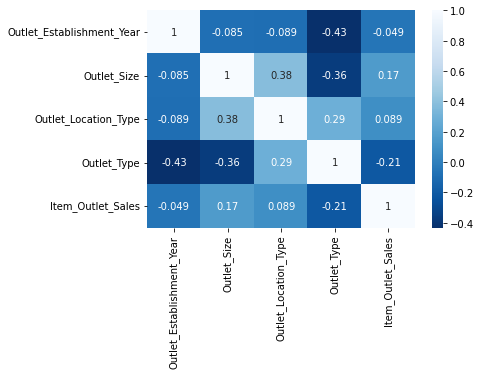

In [55]:
# Creamos el mapa de calor con los coeficientes de correlación actuales
import seaborn as sns
sns.heatmap(corr_2, cmap = 'Blues_r', annot = True)

Según esto, hay una leve  correlación entre:
* Año de establecimiento de la tienda, esto tiene sentido en el hecho de que los outlets más pequeños bien podrían haberse fundado primero y, con el paso del tiempo, se fueron montando tipos de tiendas más grandes, pero no es una regla general.
* El tamaño de la tienda y el tipo de locación también presentan una leve relación respecto al tipo de tienda, pero esto no es relevante, además de que es algo bastante obvio.
* Por último la relación entre tipo de tienda, así como el tamaño de esta y el volumen en ventas es casi nula, por lo que no podríamos afirmar o negar que un tipo de tienda venda más que otra hasta el momento.

In [56]:
# Mapa de calor unificado
corr_3 = df2.corr()

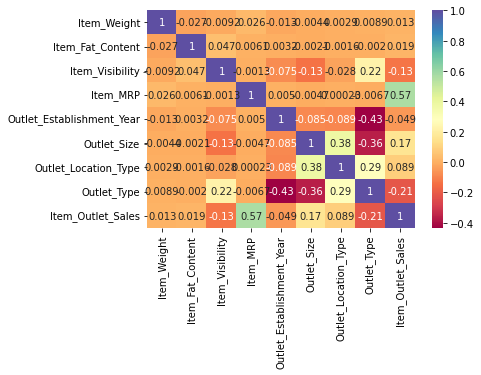

In [57]:
# Creamos el mapa de calor con los coeficientes de correlación actuales
import seaborn as sns
sns.heatmap(corr_3, cmap = 'Spectral', annot = True)

* La única correlación nueva que existe es una muy leve sobre la visibilidad de los items, respecto al tipo de tienda. Según esto, las tiendas pequeñas tendrían más visibilidad de los items, pero esto se puede deducir desde el punto de vista de que las tiendas pequeñas tendrán menor cantidad de items, lo cual hace que la visibilidad de cada ítem sea inversamente proporcional más grande en cuanto menor sea el tamaño. Sin embargo es algo muy trivial, no aporta mucho y la correlación es casi nula.

* Respecto a las preguntas que se hicieron en el punto 3 de las preguntas, vemos que no existe correlación visible entre alguna de las características de los productos y ventas.

## **Histogramas**

Decidimos montar una nueva columna diviendo las ventas por item entre su precio máximo, redondeamos hacia arriba para tener una idea más detallada sobre las salidas en cantidad de cada producto.

In [58]:
df2['Quantity']=round(df2['Item_Outlet_Sales']/df2['Item_MRP'],0)
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Quantity
0,FDA15,9.30,1,0.016047,Dairy,249.8092,OUT049,1999,2,1,1,3735.1380,15.0
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,2,3,2,443.4228,9.0
2,FDN15,17.50,1,0.016760,Meat,141.6180,OUT049,1999,2,1,1,2097.2700,15.0
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,3,4,732.3800,4.0
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,3,3,1,994.7052,18.0


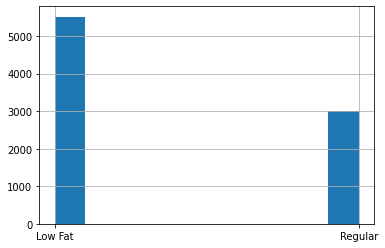

In [59]:
df['Item_Fat_Content'].hist()

Este gráfico me indica que las tiendas tienen preferencia por productos bajos en grasa, constituyendo casi el doble que los productos regulares.

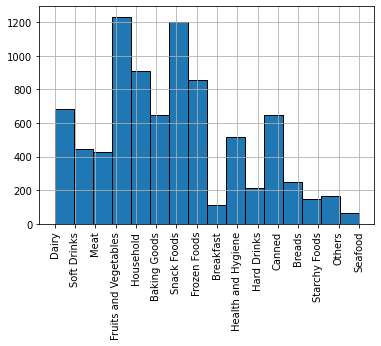

In [60]:
df['Item_Type'].hist(bins = 16,edgecolor='black')
plt.xticks(rotation = 90);

Este gráfico me indica de qué categoría tienen más productos y de cuáles no. Por ejemplo manejan mucho lo que son frutas y vegetales y snack y menos lo que es desayuno y comida de mar, este último a pesar de que manejan bastante comida congelada.

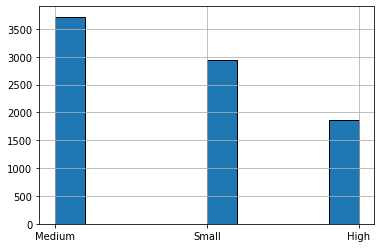

In [61]:
df['Outlet_Size'].hist(edgecolor='black')

Este gráfico me indica de que la mayor variedad de productos se maneja en las tiendas medianas y que las grandes manejan menos variedad, incluso menos que las tiendas pequeñas, contrario a lo que normalmente se vería.

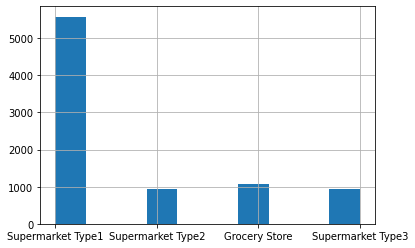

In [62]:
df['Outlet_Type'].hist()

Aquí podemos ver que existe una fuerte tendencia respecto a los 'Supermercados tipo 1', quienes manejan una variedad de maás de 5000 productos, contra los otros tipos de tiendas, con un promedio aproximado de 1000 productos.

## **Gráficos de barras**

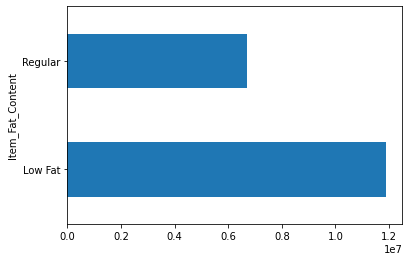

In [153]:
(df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum()).plot(kind = 'barh')

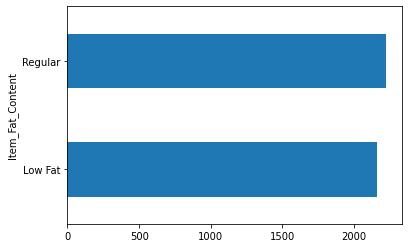

In [154]:
(df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean()).plot(kind = 'barh')

* Como pudimos ver de las anteriores gráficas, en promedio se venden igual los productos de acuerdo a contenido graso, sin embargo losproductos bajos en grasa representan mayor volumen de ventas; lo cual tiene sentido en el hecho de que se tiene mayor catálogo de productos bajos en grasa. Pero se venden en las mismas proporciones.

In [ ]:
(df.groupby(['Outlet_Identifier','Outlet_Type'])['Outlet_Type'].count()).plot(kind = 'barh')

* Aquí podemos observar que el 80% de las tiendas manejan aproximadamente la misma cantidad de variedad de producto, excepto OUT010 y OUT019 que son Grocery store, quienes manejan casi la mitad de las otras; además que solo hay un tipo de supermercado tipo 2 y 3, en su mayoría son de tipo 1.

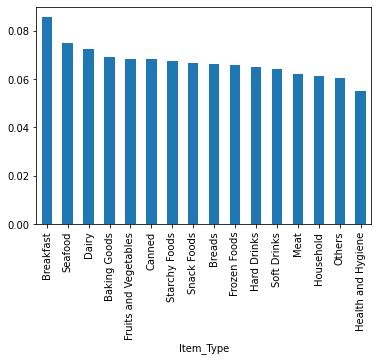

In [79]:
((df.groupby('Item_Type')['Item_Visibility'].mean()).sort_values(ascending=False)).plot(kind = 'bar')

* Podemos observar que el promedio de la visibilidad de los tipos de productos son en teoría constante, lo cual es consistente con el hecho de que no se maneja de todo en las mismas cantidades y, con base en eso, se debe dar una visualización al producto proporcional a la cantidad que tienen. Se le da un poco más de visibilidad a las categorías de desayuno y comida de mar, pero esto podría deberse

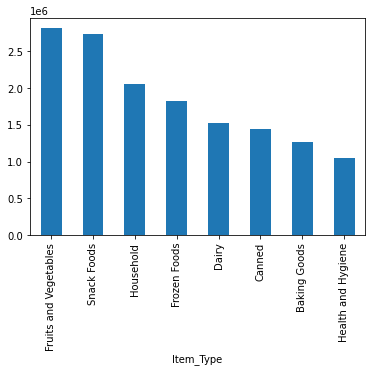

In [103]:
(((df.groupby('Item_Type')['Item_Outlet_Sales'].sum()).sort_values(ascending = False)).head(8)).plot(kind = 'bar')

* Aquí se ven los 8 productos que más generan volumen de ventas

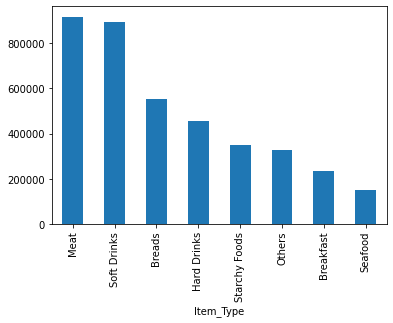

In [106]:
(((df.groupby('Item_Type')['Item_Outlet_Sales'].sum()).sort_values(ascending = False)).tail(8)).plot(kind = 'bar')

* Y aquí los 8 productos que menos nos generan volumen de ventas

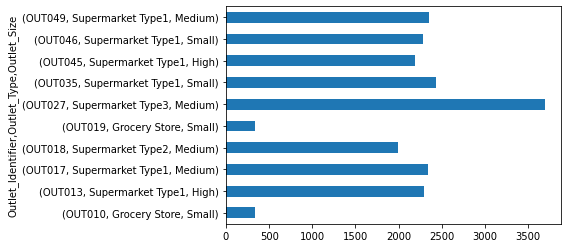

In [124]:
(df.groupby(['Outlet_Identifier','Outlet_Type','Outlet_Size'])['Item_Outlet_Sales'].mean()).plot(kind = 'barh')

* En el anterior gráfico notamos que el promedio de ventas en cada tienda es constante para la mayoría, excepto para los tiendas pequeñas  que venden notablemente más poco; ni para el supermercado de tipo 3, que vende visiblemente más, a pesar de estar catalogado en tamaño mediano.

## **Boxplots**

In [143]:
# Vamos a analizar cuántos items no son visibles y asumiremos que están descontinuados
f0 = df['Item_Visibility']==0
len(df[f0])

526

In [144]:
# Eliminaremos en un dataframe las filas donde la visibilidad  sea cero:
df3 = df2.drop(df2[df2['Item_Visibility']==0].index)
len(df3)

7997

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

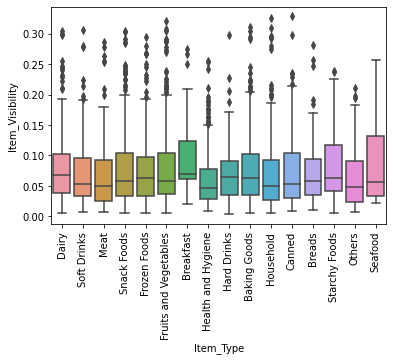

In [142]:
# Vimos anteriormente que, en promedio, la visibilidad por cada tipo de producto se mantiene constante
## Podemos ver varios outliers, pero esto podría variar demasiado de acuerdo al tipo de outlet
### Más adelante si se desea profundizar más, se podría hacer un análisis específico de esto para unos outlets definidos
sns.boxplot(x='Item_Type', y='Item_Visibility', data=df3)
plt.xticks(rotation = 90)

* Aquí vemos la visibilidad que se le da a los productos

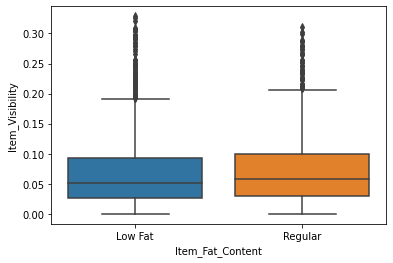

In [148]:
sns.boxplot(x='Item_Fat_Content', y='Item_Visibility', data=df)

* Podemos ver que la visibilidad es relativamente la misma, un poco más alta para los productos regular, lo cuál es raro ya que representan casi la mitad de las ventas respecto a los productos bajos en grasa y casi la mitad de variedad que tiene los bajos en grasa. No tomaremos en cuenta mucho los datos atípicos ya que son más los productos bajos en grasa que los regulares.
Más adelante se podría ver en qué tipos de productos se prefieren bajo en grasa respecto a regular y viceversa.

Ahora analizamos estos factores respecto al precio:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

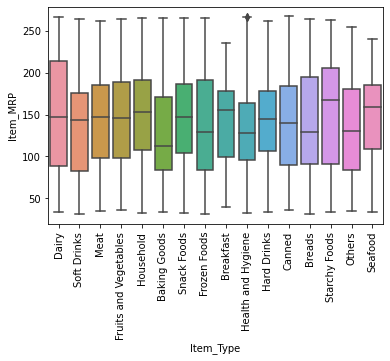

In [155]:
sns.boxplot(x='Item_Type', y='Item_MRP', data=df)
plt.xticks(rotation = 90)

* Podemos apreciar un rango de precios de acuerdo al tipo de producto, cuáles tienden a ser más costosos, cuáles a más baratos, la mediana y su ubicación; así como unos muy pocos outliers en la sección de salud e higiene. Para todo lo demás, los precios se mantienen relativamente estables en todas las categorías.

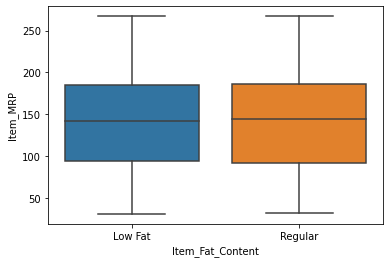

In [156]:
sns.boxplot(x='Item_Fat_Content', y='Item_MRP', data=df)

* Los precios para ambas categorías son relativamente iguales, lo cual podría explicar la preferencia por bajos en grasa, ya que normalmente son un poco más costosos que los regulares y, para este caso, no lo vemos.

Por último haremos estos dos análisis anteriores, respecto a cantidades vendidas.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

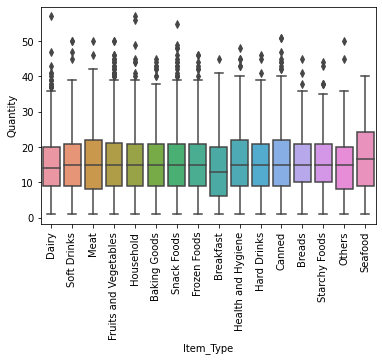

In [157]:
sns.boxplot(x='Item_Type', y='Quantity', data=df2)
plt.xticks(rotation = 90)

* Notamos que la mayoría de las categorías se vende en las mismas proporciones, excepto por algunos datos atípicos, mayormente en lácteos, frutas y vegetales, snacks, etc. Pero es muy estable la distribución de los datos en general.
No hay datos atípicos en comida de mar únicamente, se podría decir que no se hacen grandes compras de esto; para lo demás si puede pasar.
Esto también podría analizarse para tiendas específicas.

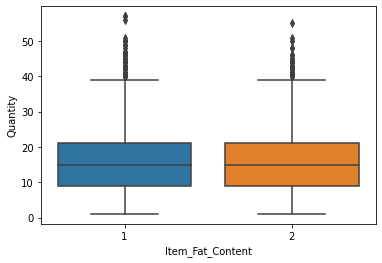

In [159]:
sns.boxplot(x='Item_Fat_Content', y='Quantity', data=df2)

* Como habíamos visto anteriormente, manejan en promedio el mismo rango de ventas, excepto por algunos atípicos.